#🛠️ Preparação dos Dados

## 📌 Extracão

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from imblearn.under_sampling import NearMiss
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dados = pd.read_csv('/content/df_tratado.csv')

In [ ]:
dados.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

## Remoção de Colunas Irrelevantes

In [ ]:
dados.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [ ]:
dados = dados.drop(columns=['customerID'])

In [ ]:
dados.columns

Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

## ✔️ Agrupamento de No e No service

In [ ]:
df = dados.copy()

cols_to_fix = [
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies'
]

for col in cols_to_fix:
    df[col] = df[col].replace('No internet service', 'No')

categorical_cols = [
       'Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod'
]

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded

,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,2.20,65.60,593.30,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,2.01,59.90,542.40,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,2.34,73.90,280.85,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,3.17,98.00,1237.85,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,2.97,83.90,267.40,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,1.90,55.15,742.90,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
7039,0,22,2.84,85.10,1873.70,True,True,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7040,0,2,1.55,50.30,92.75,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
7041,0,67,2.30,67.85,4627.65,False,True,True,True,True,...,True,True,False,True,False,True,False,False,False,True


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7043 non-null   int64  
 1   customer.tenure                                7043 non-null   int64  
 2   Total.Day                                      7032 non-null   float64
 3   account.Charges.Monthly                        7043 non-null   float64
 4   account.Charges.Total                          7032 non-null   float64
 5   Churn_Yes                                      7043 non-null   bool   
 6   customer.gender_Male                           7043 non-null   bool   
 7   customer.Partner_Yes                           7043 non-null   bool   
 8   customer.Dependents_Yes                        7043 non-null   bool   
 9   phone.PhoneService_Yes                         7043 

In [ ]:
# print(np.isinf(df_encoded).sum())
print(df_encoded.isna().sum())
# print((df_encoded == '').sum())
# print((df_encoded == ' ').sum())
# print(df_encoded.dtypes)

customer.SeniorCitizen                            0
customer.tenure                                   0
Total.Day                                        11
account.Charges.Monthly                           0
account.Charges.Total                            11
Churn_Yes                                         0
customer.gender_Male                              0
customer.Partner_Yes                              0
customer.Dependents_Yes                           0
phone.PhoneService_Yes                            0
phone.MultipleLines_No phone service              0
phone.MultipleLines_Yes                           0
internet.InternetService_Fiber optic              0
internet.InternetService_No                       0
internet.OnlineSecurity_Yes                       0
internet.OnlineBackup_Yes                         0
internet.DeviceProtection_Yes                     0
internet.TechSupport_Yes                          0
internet.StreamingTV_Yes                          0
internet.Str

In [ ]:
df_encoded = df_encoded.dropna(subset=['Total.Day', 'account.Charges.Total'])

##Verificação da Proporção de Evasão

In [ ]:
df_encoded['Churn_Yes'].value_counts(normalize=True)

,proportion
Churn_Yes,
False,0.734215
True,0.265785


##  Correlação entre as variáveis

In [ ]:
corr = df_encoded.corr()

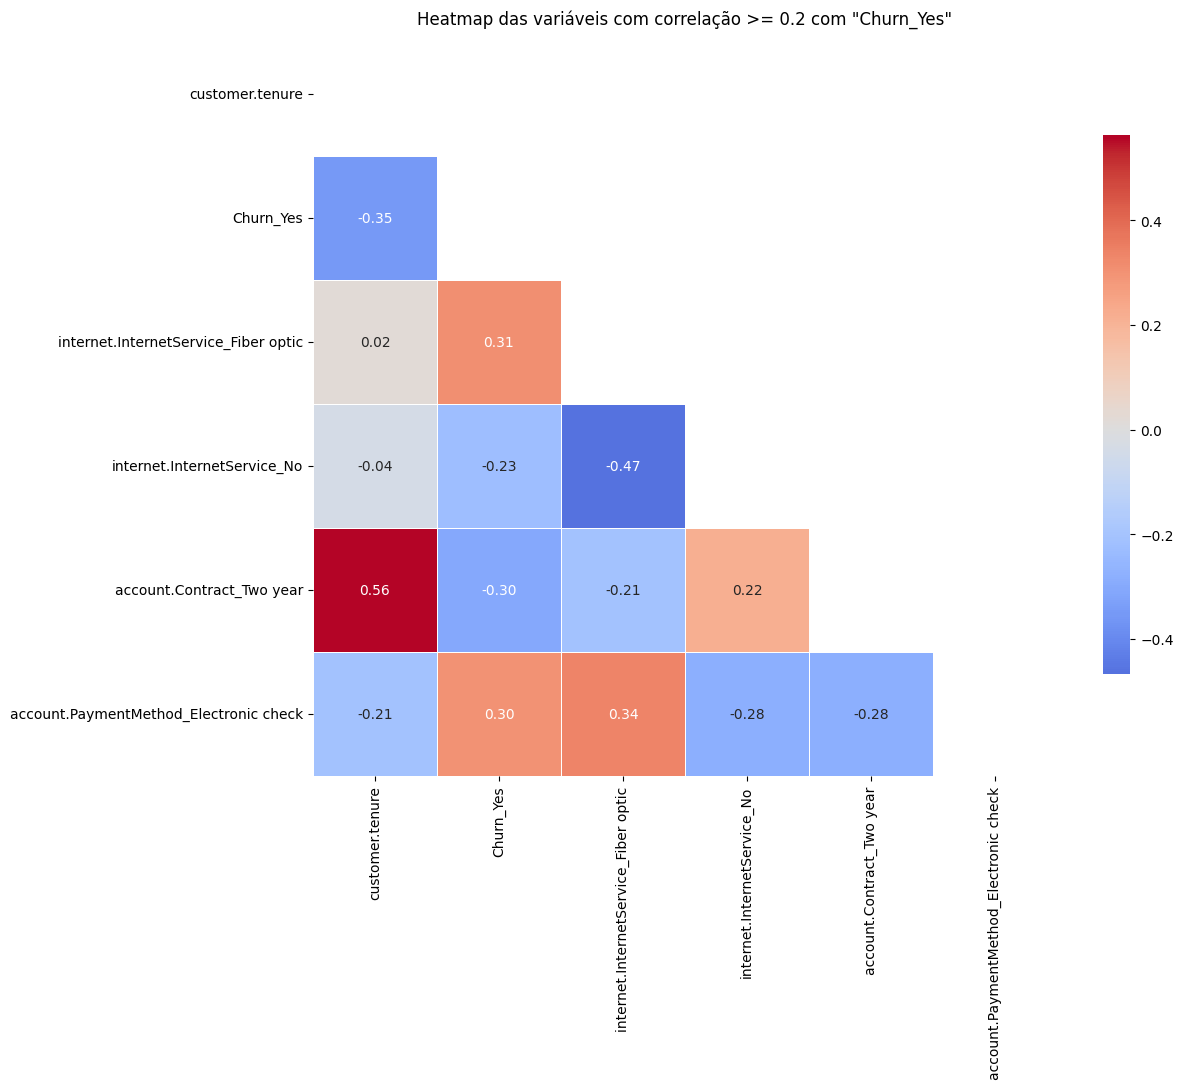

In [ ]:
target_var = 'Churn_Yes'
limiar = 0.2
variaveis_relevantes = corr.index[abs(corr[target_var]) >= limiar].tolist()

if target_var not in variaveis_relevantes:
    variaveis_relevantes.append(target_var)

corr_filtrada = corr.loc[variaveis_relevantes, variaveis_relevantes]

mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap das variáveis com correlação >= {limiar} com "{target_var}"')
plt.show()

## 🔍 Análise de Multicolinearidade

In [ ]:
X = df_encoded.drop(columns=['Churn_Yes'])
X_const = add_constant(X)

In [ ]:
X_const = X_const.astype(float)

vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

display(vif_data.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
9,phone.PhoneService_Yes,inf
10,phone.MultipleLines_No phone service,inf
4,account.Charges.Monthly,992.623632
12,internet.InternetService_Fiber optic,148.504277
3,Total.Day,133.792125
13,internet.InternetService_No,104.217179
19,internet.StreamingMovies_Yes,24.158588
18,internet.StreamingTV_Yes,24.080021
5,account.Charges.Total,10.871350
2,customer.tenure,7.613525


In [ ]:
X_filtrado = X_const.copy()

cols_tirar = [
    "phone.PhoneService_Yes",
    "phone.MultipleLines_No phone service"
]
X_filtrado.drop(columns=cols_tirar, inplace=True)


X_filtrado.drop(columns=["Total.Day"], inplace=True)


X_filtrado.drop(columns=["internet.InternetService_No"], inplace=True)

X_filtrado = X_filtrado.astype(float)


vif_data = pd.DataFrame()
vif_data["feature"] = X_filtrado.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtrado.values, i) for i in range(X_filtrado.shape[1])]


display(vif_data.sort_values(by="VIF", ascending=False))

,feature,VIF
0,const,36.498367
3,account.Charges.Monthly,18.168780
4,account.Charges.Total,10.706800
2,customer.tenure,7.548716
9,internet.InternetService_Fiber optic,6.997820
17,account.Contract_Two year,2.532131
14,internet.StreamingTV_Yes,2.188547
15,internet.StreamingMovies_Yes,2.187888
20,account.PaymentMethod_Electronic check,1.967305
21,account.PaymentMethod_Mailed check,1.847752


In [ ]:
X_final = X_filtrado.drop(columns=["account.Charges.Total"])


vif_data_final = pd.DataFrame()
vif_data_final["feature"] = X_final.columns
vif_data_final["VIF"] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]

display(vif_data_final.sort_values(by="VIF", ascending=False))

,feature,VIF
0,const,29.602764
3,account.Charges.Monthly,17.283226
8,internet.InternetService_Fiber optic,6.936112
2,customer.tenure,2.826197
16,account.Contract_Two year,2.521228
13,internet.StreamingTV_Yes,2.166619
14,internet.StreamingMovies_Yes,2.163842
19,account.PaymentMethod_Electronic check,1.964004
20,account.PaymentMethod_Mailed check,1.825717
12,internet.TechSupport_Yes,1.712098


## Modelos Preditivos


###Regressão Logística

In [ ]:
colunas_tirar =[ "phone.PhoneService_Yes","phone.MultipleLines_No phone service","account.Charges.Total","internet.InternetService_No","Total.Day"]
df_filtrado = df_encoded.copy()
df_filtrado.drop(columns=colunas_tirar, inplace=True)

In [ ]:
x = df_filtrado.drop(columns=['Churn_Yes'])
y = df_filtrado['Churn_Yes']

**Separando os dados**

**Separando os dados em treino e teste**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


**Normalizando os dados**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Balanceando dados com Undersample**

In [ ]:
smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_over, y_train_over)

y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

print("Regressão Logística")
print("Acurácia:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Regressão Logística
Acurácia: 0.7502369668246446
ROC AUC: 0.8453628296790868
Matriz de Confusão:
 [[1129  420]
 [ 107  454]]
              precision    recall  f1-score   support

       False       0.91      0.73      0.81      1549
        True       0.52      0.81      0.63       561

    accuracy                           0.75      2110
   macro avg       0.72      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110



**Balanceando dados com Undersample**

In [ ]:
undersample= NearMiss(version=3)
X_train_under, y_train_under = undersample.fit_resample(X_train_scaled, y_train)

In [ ]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_under, y_train_under)

y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

print("Regressão Logística")
print("Acurácia:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Regressão Logística
Acurácia: 0.7796208530805687
ROC AUC: 0.8220046513822385
Matriz de Confusão:
 [[1273  276]
 [ 189  372]]
              precision    recall  f1-score   support

       False       0.87      0.82      0.85      1549
        True       0.57      0.66      0.62       561

    accuracy                           0.78      2110
   macro avg       0.72      0.74      0.73      2110
weighted avg       0.79      0.78      0.78      2110



### Randon Forest

**Com Oversample**

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_over, y_train_over)

y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

print("Random Forest")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Acurácia: 0.7786729857819905
ROC AUC: 0.8241588788810905
Matriz de Confusão:
 [[1307  242]
 [ 225  336]]
              precision    recall  f1-score   support

       False       0.85      0.84      0.85      1549
        True       0.58      0.60      0.59       561

    accuracy                           0.78      2110
   macro avg       0.72      0.72      0.72      2110
weighted avg       0.78      0.78      0.78      2110



**Com Undersample**

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_under, y_train_under)

y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

print("Random Forest")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Acurácia: 0.7611374407582938
ROC AUC: 0.7660908250852428
Matriz de Confusão:
 [[1269  280]
 [ 224  337]]
              precision    recall  f1-score   support

       False       0.85      0.82      0.83      1549
        True       0.55      0.60      0.57       561

    accuracy                           0.76      2110
   macro avg       0.70      0.71      0.70      2110
weighted avg       0.77      0.76      0.76      2110



###Árvore de Decisão

**Com Oversample**

In [ ]:
tree = DecisionTreeClassifier(max_depth = 10)
tree.fit(X_train_over, y_train_over)

y_pred_tree = tree.predict(X_test_scaled)
y_prob_tree = tree.predict_proba(X_test_scaled)[:, 1]

print("Árvore de Decisão")
print("Acurácia:", accuracy_score(y_test, y_pred_tree))
print("ROC AUC:", roc_auc_score(y_test, y_prob_tree))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Árvore de Decisão
Acurácia: 0.7398104265402844
ROC AUC: 0.7725500552941407
Matriz de Confusão:
 [[1190  359]
 [ 190  371]]
              precision    recall  f1-score   support

       False       0.86      0.77      0.81      1549
        True       0.51      0.66      0.57       561

    accuracy                           0.74      2110
   macro avg       0.69      0.71      0.69      2110
weighted avg       0.77      0.74      0.75      2110



**Com Undersample**

In [ ]:
tree = DecisionTreeClassifier(max_depth = 5)
tree.fit(X_train_over, y_train_over)

y_pred_tree = tree.predict(X_test_scaled)
y_prob_tree = tree.predict_proba(X_test_scaled)[:, 1]
print("Árvore de Decisão")
print("Acurácia:", accuracy_score(y_test, y_pred_tree))
print("ROC AUC:", roc_auc_score(y_test, y_prob_tree))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Árvore de Decisão
Acurácia: 0.7331753554502369
ROC AUC: 0.8261284089902173
Matriz de Confusão:
 [[1102  447]
 [ 116  445]]
              precision    recall  f1-score   support

       False       0.90      0.71      0.80      1549
        True       0.50      0.79      0.61       561

    accuracy                           0.73      2110
   macro avg       0.70      0.75      0.70      2110
weighted avg       0.80      0.73      0.75      2110



## Conclusão

| Modelo | Tipo                | Acurácia | ROC AUC | Recall True | F1 True | Balanceando de dados                                            |
| ------ | ------------------- | -------- | ------- | ----------- | ------- | ------------------------------------------------------- |
| 01     | Regressão Logística | 0.750    | 0.845   | 0.81        | 0.63    | Oversample                |
| 02     | Regressão Logística | 0.780    | 0.822   | 0.66        | 0.62    | Undersample                      |
| 03     | Random Forest       | 0.779    | 0.824   | 0.60        | 0.59    | Oversample|
| 04     | Random Forest       | 0.761    | 0.766   | 0.60        | 0.57    | Undersample                    |
| 05     | Árvore de Decisão   | 0.740    | 0.773   | 0.66        | 0.57    | Oversample               |
| 06     | Árvore de Decisão   | 0.733    | 0.826   | 0.79        | 0.61    | Undersample                |


**Metricas mais relevantes para analise de  Churn**


1.   **ROC AUC**: indica capacidade de separar bem classes
2.   **Recall**: é crucial, para evitar falsos negativos



O **Modelo 01** (Regressão Logística) é o mais indicado para análise de churn, porque equilibra bom **ROC AUC** e alto **recall** indentificando uma maior porcentagem de clientes que cancelariam a assinatura, mesmo não tendo a maior acurácia geral ja que capturar corretamente os clientes que vão sair é mais importante que acertar os que permanecem.